### Importing necessary modules

In [5]:
import torch
print(torch.__version__) 

1.3.1+cpu


In [6]:
from inltk.inltk import tokenize
from inltk.inltk import get_embedding_vectors

In [7]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

### Read the data

In [9]:
data = pd.read_csv("q1.csv")

## Data Exploration & Preprocessing

In [10]:
data.head()

,img_id,ans,marks
0,IMG01,ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ...,5.0
1,IMG02,ଇଂଗରେଜକଂ ପ୍ରଭାବିତ ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ରାଜ୍ୟାଭିଳ...,5.0
2,IMG03,NaN,3.0
3,IMG04,ସାମନ୍ତ ସନ୍ଧି ପ୍ରଥା ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ|ଏହାର...,4.0
4,IMG05,ସାମନ୍ତ ସନ୍ଧି ଲର୍ଡ଼ ମାକଏଲେକଂ ଦ୍ୱାରା ପ୍ରଣୀତ ହୋଇଥ...,1.0


In [11]:
data = data[data['ans'].notna()]
data.head()

,img_id,ans,marks
0,IMG01,ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ...,5.0
1,IMG02,ଇଂଗରେଜକଂ ପ୍ରଭାବିତ ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ରାଜ୍ୟାଭିଳ...,5.0
3,IMG04,ସାମନ୍ତ ସନ୍ଧି ପ୍ରଥା ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ|ଏହାର...,4.0
4,IMG05,ସାମନ୍ତ ସନ୍ଧି ଲର୍ଡ଼ ମାକଏଲେକଂ ଦ୍ୱାରା ପ୍ରଣୀତ ହୋଇଥ...,1.0
5,IMG06,ଭାରତରେ ଇଂଗ୍ରେଜ଼ ମାନଂକ ସାମ୍ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ୱ...,5.0


In [12]:
data.reset_index(drop= True, inplace= True)

In [13]:
data.count()

img_id    67
ans       67
marks     67
dtype: int64

In [14]:
data.describe(include = 'all')

,img_id,ans,marks
count,67,67,67.000000
unique,67,67,NaN
top,IMG50,ଭାରତକୁ ଇଂଗ୍ରେଜ଼ ମାନଙ୍କ ଶାସନରେ ଆଣିବା ପାଇଁ ୱେଲସେ...,NaN
freq,1,1,NaN
mean,NaN,NaN,3.649254
std,NaN,NaN,1.544823
min,NaN,NaN,0.000000
25%,NaN,NaN,3.000000
50%,NaN,NaN,4.000000
75%,NaN,NaN,5.000000


## Mark Distribution:

In [15]:
data.marks.unique()

array([5. , 4. , 1. , 3. , 2. , 4.5, 0. , 1.5, 0.5, 3.5, 2.5])

In [16]:
len(data.marks.unique())

11

In [17]:
data['marks'].value_counts(sort = True, ascending = True)

1.5     1
0.5     1
3.5     1
2.5     1
0.0     3
1.0     4
2.0     6
4.5     7
4.0     8
3.0     9
5.0    26
Name: marks, dtype: int64

In [18]:
data['marks'].value_counts().sort_index()

0.0     3
0.5     1
1.0     4
1.5     1
2.0     6
2.5     1
3.0     9
3.5     1
4.0     8
4.5     7
5.0    26
Name: marks, dtype: int64

In [19]:
data['marks'].value_counts().sort_index().tolist()

[3, 1, 4, 1, 6, 1, 9, 1, 8, 7, 26]

In [20]:
data['marks'].value_counts().sort_index().index.tolist()

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

<BarContainer object of 11 artists>

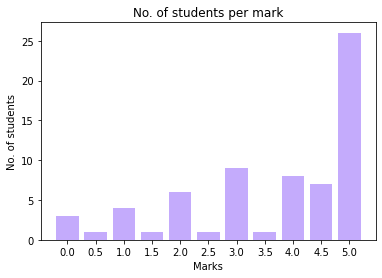

In [21]:
x = data['marks'].value_counts().sort_index().index.tolist()
y = data['marks'].value_counts().sort_index().tolist()
xpos = np.arange(len(x))
plt.xticks(xpos, x)
plt.xlabel('Marks')
plt.ylabel('No. of students')
plt.title('No. of students per mark')
plt.bar(xpos, y, color='#c4abfc')

## Feature Extraction - no_of_sent

In [22]:
sent = data.iloc[0]['ans'].split('|')
sent[:-1]

['ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ଏକ ପ୍ରଥା ଆରଂଭ କରିଥିଲେ ଜାହର ନାମ ଥିଲା ଅଧିନତା ମୁଳକ ମିତ୍ରତା ଓ ସାମନ୍ତ ସନ୍ଧି',
 'ଜେଉଁ ଦେସିୟ ରାଜା ଏହାକୁ ଗ୍ରହଣ କରତିଂ ସେମାନେ ଇଂଗରେଜ ସରକାରକଂ ବିନା ଅନୂମତିରେ ଅନ୍ୟ ଦେଶିୟ ବା ବିଦେଶୀ ରାଜ୍ୟ ସହ ସବଂଧ ରଖିପାରିବେ ନାହିଂ',
 'ସତ୍ର ଅନୁଜାଇ ସେହି ରାଜା କୁଂ ଦଲେ ଇଂଗରେଜ ସୈନ୍ୟକୁ ନିଜ ରାଜ୍ୟ ରେ ଦରମା ଦେଇ ରଖିବେ',
 'ଯଦି ଅର୍ଥ ଦବାକୁ ସାମର୍ଥୟ୍ ନଥିବେ ଇଂଗରେଜ ମାନକ୍କୁଂ ତାକ୍କଂ ରାଜ୍ୟର ଅର୍ଧେକ ଅଂଶ ଦେବାକୁ ପଦିବ',
 'ହାଇଦ୍ରାବାଦର ନବାବ ଓ ଅଯୋଧ୍ୟାର ନିଜାମ ଏହାକୁ ଗ୍ରହଣ କରିଥିଲେ',
 'ପରେ ସିନଧିଆ ଓ ଭୋସଲାର ଶାସକ ଏହି ସନ୍ଧି ଗ୍ରହଣ କାଲେ',
 'ଏହାପରେ ଜୋଧପୁର ଜୟପୁର ରାଜପୁତାନା ପରି ଅନେକ ରାଜ୍ୟର ରାଜା ଏହି ସନ୍ଧି ଗ୍ରହଣ କଲେ']

In [23]:
len(sent[:-1])

7

In [24]:
# creating a new series
no_of_sent = pd.Series([], dtype = int) 

for i in range(len(data)):
    sent = data.iloc[i]['ans'].split('|')
    no_of_sent[i] = len(sent[:-1])
    
# adding the created series into the dataframe at position 2
data.insert(2, "no_of_sent", no_of_sent) 

In [25]:
data.head()

,img_id,ans,no_of_sent,marks
0,IMG01,ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ...,7,5.0
1,IMG02,ଇଂଗରେଜକଂ ପ୍ରଭାବିତ ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ରାଜ୍ୟାଭିଳ...,9,5.0
2,IMG04,ସାମନ୍ତ ସନ୍ଧି ପ୍ରଥା ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ|ଏହାର...,5,4.0
3,IMG05,ସାମନ୍ତ ସନ୍ଧି ଲର୍ଡ଼ ମାକଏଲେକଂ ଦ୍ୱାରା ପ୍ରଣୀତ ହୋଇଥ...,5,1.0
4,IMG06,ଭାରତରେ ଇଂଗ୍ରେଜ଼ ମାନଂକ ସାମ୍ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ୱ...,6,5.0


### Relationship between no. of sentences and marks :-

In [26]:
data.no_of_sent.unique()

array([ 7,  9,  5,  6,  3,  4,  8,  2, 10, 11])

In [27]:
len(data.no_of_sent.unique())

10

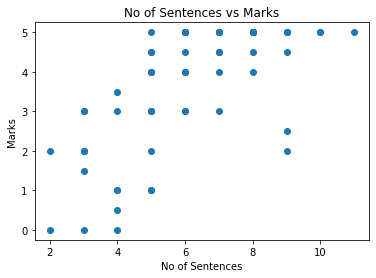

In [28]:
plt.xlabel("No of Sentences")
plt.ylabel("Marks")
plt.title("No of Sentences vs Marks")
plt.scatter(data["no_of_sent"], data["marks"])

## Vectorising 

In [ ]:
# # creating a new series
# vectors = pd.Series([], dtype = float) 
    
# for row_index,row in data.iterrows():
#     vect = get_embedding_vectors(row['ans'], 'or')
#     vectors[row_index] =  np.asarray(vectors, np.float32)
    
# # adding the created series into the dataframe at position 2
# data.insert(2, "vectors", vectors) 

In [40]:
data.insert(2, "vectors", np.nan)

In [41]:
# data.drop('vectors', inplace= True, axis= 1)

In [42]:
data.head()

,img_id,ans,vectors,no_of_sent,marks
0,IMG01,ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ...,NaN,7,5.0
1,IMG02,ଇଂଗରେଜକଂ ପ୍ରଭାବିତ ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ରାଜ୍ୟାଭିଳ...,NaN,9,5.0
2,IMG04,ସାମନ୍ତ ସନ୍ଧି ପ୍ରଥା ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ|ଏହାର...,NaN,5,4.0
3,IMG05,ସାମନ୍ତ ସନ୍ଧି ଲର୍ଡ଼ ମାକଏଲେକଂ ଦ୍ୱାରା ପ୍ରଣୀତ ହୋଇଥ...,NaN,5,1.0
4,IMG06,ଭାରତରେ ଇଂଗ୍ରେଜ଼ ମାନଂକ ସାମ୍ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ୱ...,NaN,6,5.0


In [45]:
   
for row_index,row in data.iterrows():
    vect = get_embedding_vectors(row['ans'], 'or')
    data["vectors"][row_index] = np.asarray(vect, np.float32)
    

/home/deepak/Documents/answer_evaluator/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: setting an array element with a sequence.

In [32]:
tokenize(text , 'or')

NameError: name 'text' is not defined

In [ ]:
vectors = get_embedding_vectors(text, 'or')

In [ ]:
vectors[0].shape

In [ ]:
get_embedding_vectors(text, 'or')

In [ ]:
len(vectors)

In [ ]:
len(tokenize(text, 'or'))